# Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [17]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [18]:
df=pd.read_csv('train.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Who were the passangers on the titanic? (Ages, Gender,Class,etc...)
What deck were the passangers on and how does that relate to their class?
Where did the passangers come from?
Who was alone and who was with family?
What factors helped someone survive the sinking?

Who were the passangers on the titanic?

In [21]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

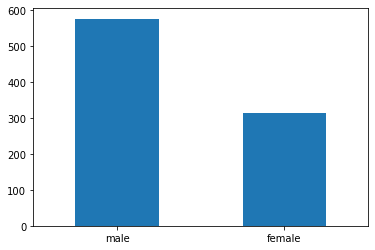

In [25]:
#Check the Sex Distribution
df['Sex'].value_counts().plot(kind='bar',rot=0)
#sns.factorplot('Sex',data=df)

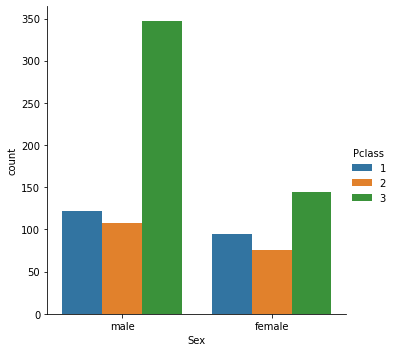

In [33]:
sns.factorplot('Sex',data=df,hue='Pclass', kind='count')

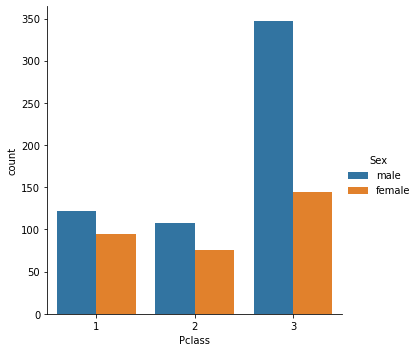

In [34]:
sns.factorplot('Pclass',data=df,hue='Sex', kind='count')

In [35]:
def male_female_child(passanger):
    age,sex=passanger
    if age<16:
        return 'child'
    else:
        return sex

In [36]:
df['person']=df[['Age','Sex']].apply(male_female_child,axis=1)

In [37]:
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


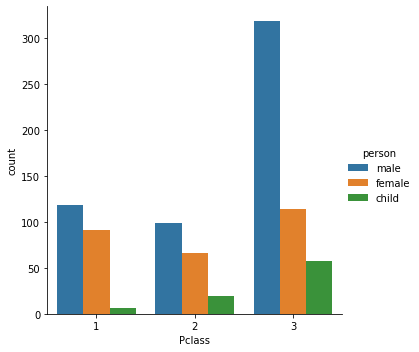

In [42]:
sns.factorplot('Pclass',data=df,hue='person', kind='count')

<AxesSubplot:>

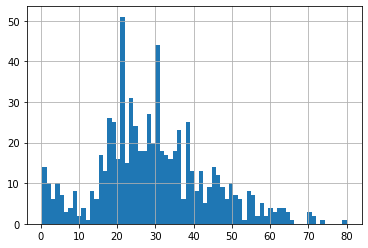

In [43]:
df['Age'].hist(bins=70)

In [46]:
df['Age'].mean()

29.69911764705882

In [47]:
df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

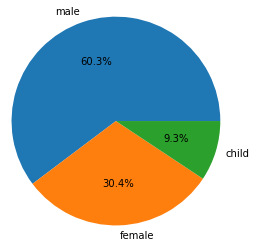

In [52]:
plt.pie(df.person.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['male', 'female','child'])


# display the plot
plt.show()

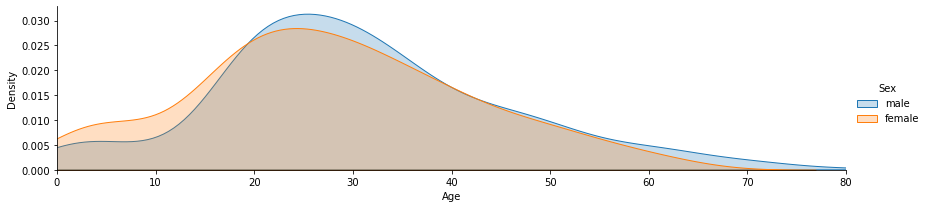

In [49]:
fig=sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest= df['Age'].max()

fig.set(xlim=(0, oldest))
fig.add_legend()

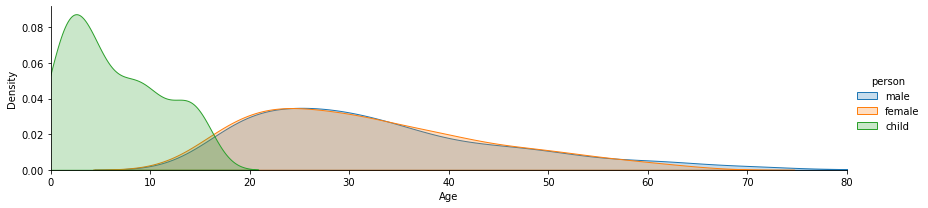

In [50]:
fig=sns.FacetGrid(df,hue='person',aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest= df['Age'].max()

fig.set(xlim=(0, oldest))
fig.add_legend()

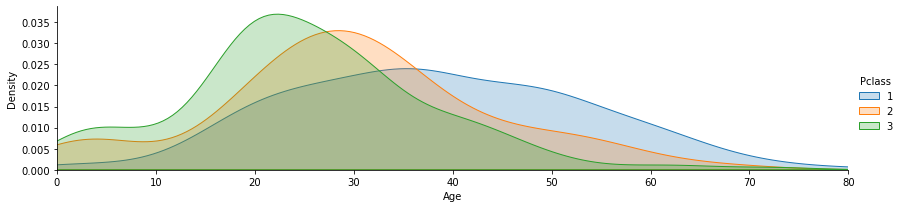

In [53]:
fig=sns.FacetGrid(df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest= df['Age'].max()

fig.set(xlim=(0, oldest))
fig.add_legend()

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [55]:
deck=df['Cabin'].dropna()

In [56]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

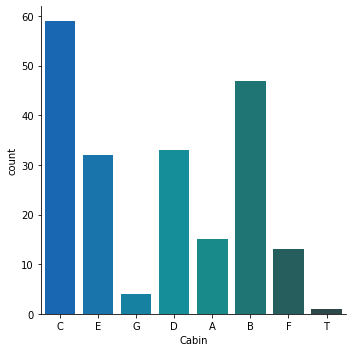

In [64]:
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=pd.DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data=cabin_df,kind='count', palette='winter_d')

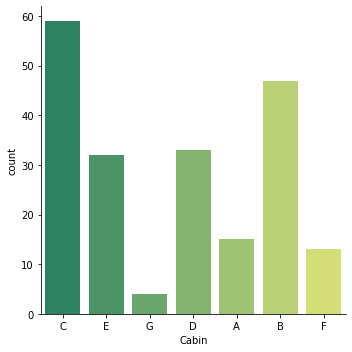

In [65]:
cabin_df=cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,kind='count', palette='summer')

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


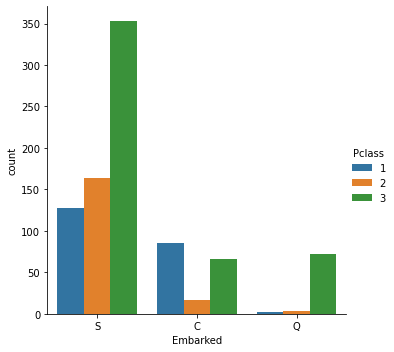

In [72]:
#where passangers came from
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')

In [73]:
#who was alone and who was with family?
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [74]:
df['Alone']=df.SibSp + df.Parch

In [75]:
df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [76]:
df['Alone'].loc[df['Alone']>0]='With_family'
df['Alone'].loc[df['Alone']==0]='Alone'

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With_family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With_family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With_family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


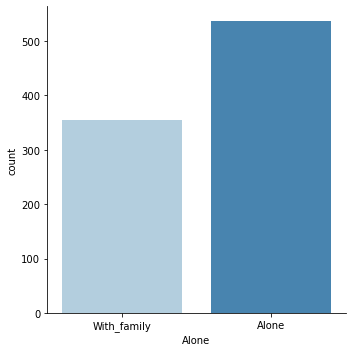

In [83]:
sns.factorplot('Alone',data=df, kind='count', palette='Blues')

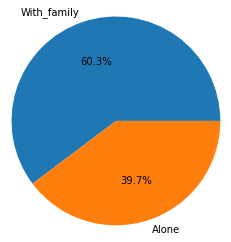

In [81]:
plt.pie(df.Alone.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['With_family', 'Alone'])


# display the plot
plt.show()

where there Survivors ?

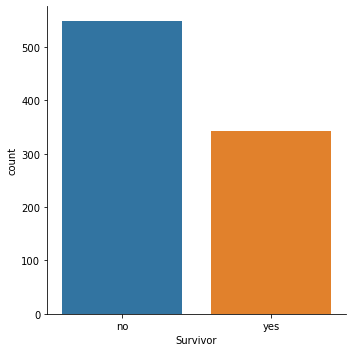

In [85]:
df['Survivor']=df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data=df, kind='count')

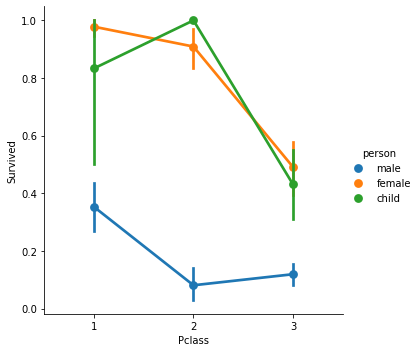

In [87]:
sns.factorplot('Pclass','Survived',hue='person',data=df)

Priority for survival was given to women and children regardless of the class

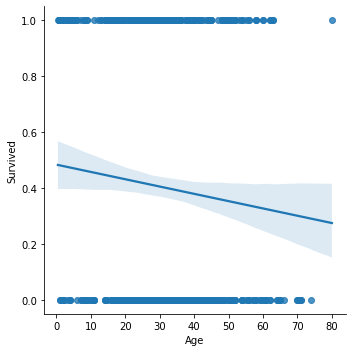

In [88]:
sns.lmplot('Age','Survived',data=df)

The older the passanger was, the less their chances of survival

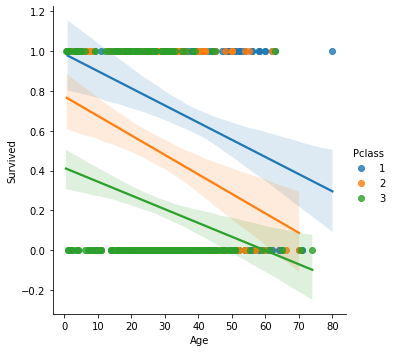

In [90]:
sns.lmplot('Age','Survived',hue='Pclass',data=df)

In [93]:
generations=[10,20,40,60,80]

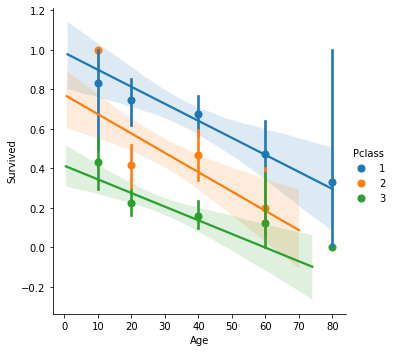

In [94]:
sns.lmplot('Age','Survived',hue='Pclass',data=df,x_bins=generations)

generally more first class passangers had a higer chance of survival

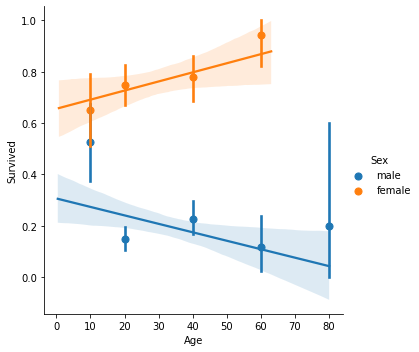

In [95]:
sns.lmplot('Age','Survived',hue='Sex',data=df,x_bins=generations)

Older females survived compared to the Older males

In [96]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With_family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With_family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With_family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


<AxesSubplot:xlabel='Alone', ylabel='count'>

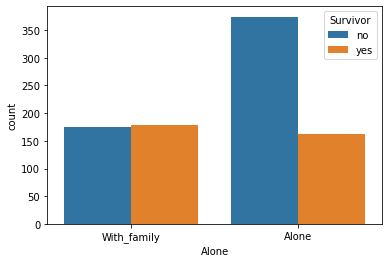

In [99]:
sns.countplot(x='Alone',data=df,hue='Survivor')